In [1]:
import numpy as np

w_i_h1 = np.load('model2/w_i_h1.npy')
b_i_h1 =  np.load('model2/b_i_h1.npy')

w_h1_h2 = np.load('model2/w_h1_h2.npy')
b_h1_h2 = np.load('model2/b_h1_h2.npy')

w_h2_h3 = np.load('model2/w_h2_h3.npy')
b_h2_h3 = np.load('model2/b_h2_h3.npy' )

w_h3_o = np.load('model2/w_h3_o.npy')
b_h3_o = np.load('model2/b_h3_o.npy')

We figured out how to define this dictionary.
Basically, np.argmax() that comes across later during test classif., returns the index of letter with highest prob., and since indexing starts from 0, A corresponds to 0 index, B to 1, etc.

In [2]:
letter_dict = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'I', 9:'J', 10:'K', 11:'L', 12:'M', 13:'N', 14:'O', 15:'P', 16:'Q', 17:'R', 18:'S', 19:'T', 20:'U', 21:'V', 22:'W', 23:'X', 24:'Y', 25:'Z'}

In [3]:
import numpy as np
import pandas as pd 

#testing_letter = pd.read_csv('./emnist_encoded_test2.csv')
#training_letter = pd.read_csv('./emnist_encoded_train.csv')


In [4]:
y1 = pd.read_csv('dataset/y_train_encoded.csv').values ## The first 26 columns correspond one-hot-encoded to labels
x1 = pd.read_csv('dataset/X_train.csv').values ## All the other columns correspond to pixel values for each 28x28 image , to know the amount of images  
#testing_letters                          ## in front of each label, we have 784 values in a row, which correspond to pixels in a single image of that label
y2 = pd.read_csv('dataset/y_test_encoded.csv').values ## LABELS 
x2 =  pd.read_csv('dataset/X_test.csv').values

print(y1.shape)
print(x1.shape)

(71039, 26)
(71039, 784)


In [5]:
# Normalise and reshape data
train_images = x1 / 255.0
test_images = x2 / 255.0

train_images_number = train_images.shape[0]
train_images_height = 28
train_images_width = 28
train_images_size = train_images_height*train_images_width

train_images = train_images.reshape(train_images_number, train_images_height, train_images_width, 1)
print(train_images.shape)


test_images_number = test_images.shape[0]
test_images_height = 28
test_images_width = 28
test_images_size = test_images_height*test_images_width

test_images = test_images.reshape(test_images_number, test_images_height, test_images_width, 1)
print(test_images.shape)

train_labels = y1
test_labels = y2

train_labels.shape

(71039, 28, 28, 1)
(17760, 28, 28, 1)


(71039, 26)

In [11]:
import numpy as np

correct_predictions = 0
total_predictions = len(test_images)

for index in range(total_predictions):
    img = test_images[index]
    # Forward propagation
    h1_pre = b_i_h1 + w_i_h1.dot(img.reshape(-1,1))
    h1 = np.log(1 + np.exp(h1_pre))  # Softplus activation

    h2_pre = b_h1_h2 + w_h1_h2.dot(h1)
    h2 = np.log(1 + np.exp(h2_pre))  # Softplus activation

    h3_pre = b_h2_h3 + w_h2_h3.dot(h2)
    h3 = np.log(1 + np.exp(h3_pre))  # Softplus activation

    o_pre = b_h3_o + w_h3_o.dot(h3)
    o = 1 / (1 + np.exp(-o_pre))
    
    # Get the predicted label
    predicted_label = letter_dict[o.argmax()]
    
    # Convert one-hot-encoded array to label
    actual_label_index = np.argmax(test_labels[index])
    actual_label = letter_dict[actual_label_index]
    
    if predicted_label == actual_label:
        correct_predictions += 1

# Calculate accuracy
accuracy = (correct_predictions / total_predictions) * 100
print("Accuracy:", accuracy)


Accuracy: 87.2072072072072


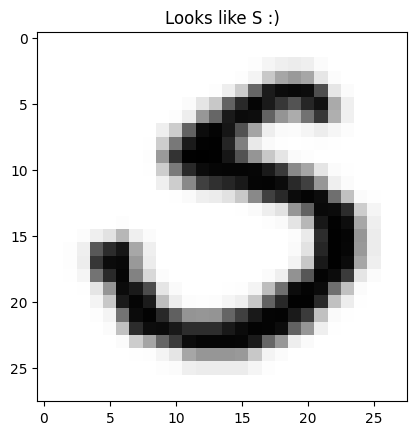

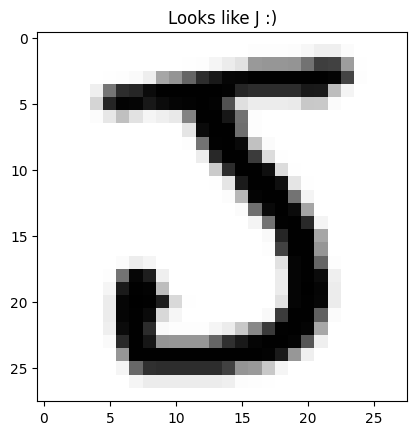

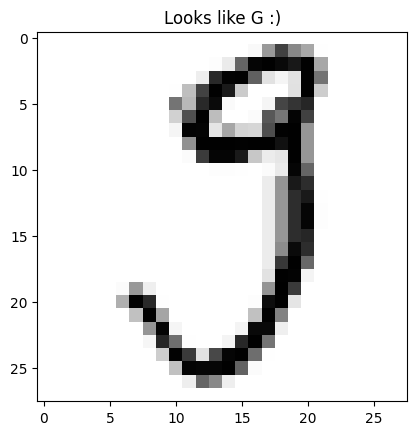

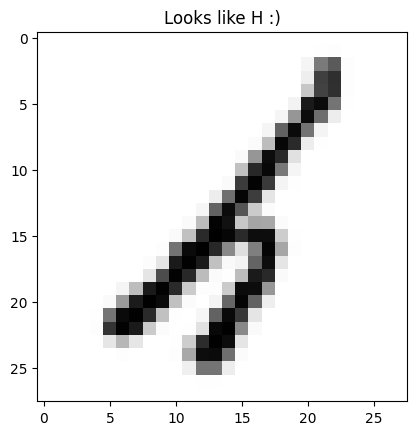

ValueError: invalid literal for int() with base 10: ''

In [9]:
# Show results
import matplotlib.pyplot as plt 
from scipy.ndimage import rotate


while True:
    index = int(input("Enter a number (0 - 14798): "))
    img = test_images[index]
    plt.imshow(np.fliplr(rotate(img.reshape(28, 28),-90)), cmap="Greys")
    
    img = img.reshape(-1,1)
    # Forward propagation
    h1_pre = b_i_h1 + w_i_h1.dot(img)
    h1 = np.log(1 + np.exp(h1_pre))  # Softplus activation
    
    h2_pre = b_h1_h2 + w_h1_h2.dot(h1)
    h2 = np.log(1 + np.exp(h2_pre))  # Softplus activation
    
    h3_pre = b_h2_h3 + w_h2_h3.dot(h2)
    h3 = np.log(1 + np.exp(h3_pre))  # Softplus activation
    
    o_pre = b_h3_o + w_h3_o.dot(h3)
    o = 1 / (1 + np.exp(-o_pre))
    #print(o.shape)
    plt.title(f"Looks like {letter_dict[o.argmax()]} :)")
    plt.show()
